In [1723]:
import os 
path ="/Users/ambarruiz/Documents/2019-AI-Internship"
os.chdir(path)
os.getcwd()

'/Users/ambarruiz/Documents/2019-AI-Internship'

In [1724]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [1725]:
data = pd.read_csv('spystocks.csv')
data ['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data = data.set_index(['Date'])


In [1726]:
from datetime import datetime
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-06-02   85.343750   85.500000   84.718750   84.781250   56.808811   
1997-06-03   84.406250   85.437500   84.343750   84.500000   56.620316   
1997-06-04   84.531250   84.750000   84.078125   84.406250   56.557510   
1997-06-05   84.593750   85.312500   84.421875   84.718750   56.766926   
1997-06-06   84.593750   86.437500   84.593750   86.375000   57.876694   
1997-06-09   86.437500   86.875000   86.343750   86.812500   58.169849   
1997-06-10   86.843750   87.406250   86.500000   87.078125   58.347832   
1997-06-11   87.000000   87.406250   86.828125   87.281250   58.483936   
1997-06-12   87.875000   89.000000   87.562500   88.968750   59.614666   
1997-06-13   89.062500   90.000000   88.906250   89.718750   60.117214   
1997-06-16   89.750000   90.000000   89.468750   89.750000   60.138165   
1997-06-17   89.437500   90.234375   8

In [1727]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_2'] = data['percent_change'].rolling(2).std()
data['ret_2'] = data['percent_change'].rolling(2).mean()
data.dropna(inplace=True)
# X is the input variable

X = data[['Open-Close', 'High-Low', 'std_2', 'ret_2']]


# Y is the target or output variable

y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

In [1732]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [1733]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  86.44965934897805


In [1734]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.84      0.88      0.86       608
           1       0.89      0.86      0.87       713

   micro avg       0.86      0.86      0.86      1321
   macro avg       0.86      0.87      0.86      1321
weighted avg       0.87      0.86      0.86      1321



In [1735]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

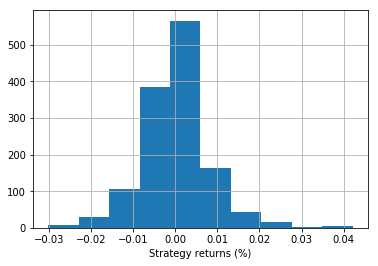

In [1736]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()


#Output variable: If tomorrow’s close price is greater than today's close price then 
#the output variable is set to 1 and otherwise set to -1. 1 indicates to buy the stock
#and -1 indicates to sell the stock




#Daily returns histogram

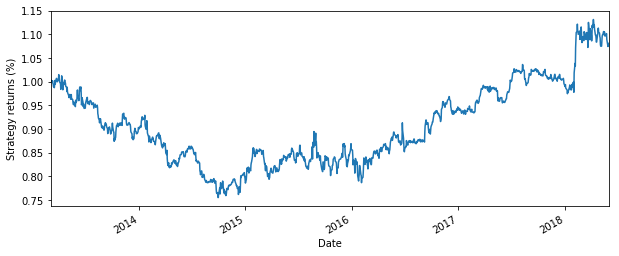

In [1737]:

import matplotlib.pylab as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,4

(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

##The output displays the strategy returns and daily returns according to the code for 
#the Random Forest Classifier.